In [1]:
#import all the necessary libraries
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#read the data
os.chdir(r'C:\Users\tejan\Downloads\creditcardfraud')
data = pd.read_csv("creditcard.csv")

print("The first 5 rows in the dataset are :", "\n", data.head())
print("\n")
print("The shape of the data is :", str(data.shape))

The first 5 rows in the dataset are : 
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206

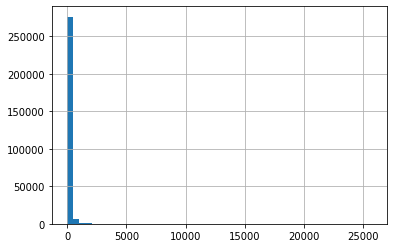

In [4]:
#plot the histogram of the amount variable
data.Amount.hist(bins = 50)

In [6]:
#scale the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
data_standardized = scaler.fit_transform(data)

In [48]:
#Proportion of class labels in the 2 clusters built using kmeans clustering
X.groupby("ClusterID")['Class'].mean()

ClusterID
0    0.338447
1    0.999485
Name: Class, dtype: float64

In [49]:
#cross tab of 2 clusters and class labels
pd.crosstab(X.ClusterID, X.Class)

Class,0,1
ClusterID,,
0,284280,145436
1,35,67923


In [70]:
#reading training and testing data separately and merging them 
d1 = pd.read_csv("SMOTE_TRAIN.csv")
d2 = pd.read_csv("test.csv")
d = pd.concat([d1, d2], ignore_index = True)

In [71]:
d.shape

(497674, 30)

In [72]:
d.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.011068,0.672004,-0.939272,-0.345831,0.736893,-0.194330,0.535538,0.249765,-0.455568,-0.961957,...,0.451002,1.242712,-0.406219,-2.383611,-0.306647,-0.187582,-0.037876,0.056387,-0.200850,0
1,-0.171802,0.667620,0.842058,0.047052,-0.017893,-0.745167,0.544538,-0.034197,-0.273403,-0.453668,...,-0.370656,-1.020303,-0.018123,0.515668,-0.347139,0.154590,0.594596,0.298501,-0.345702,0
2,-0.126808,0.499145,0.124836,-0.508023,0.152991,-0.616567,0.617461,0.069294,0.176808,0.105910,...,-0.344201,-0.843687,0.179235,-0.081430,-1.081149,0.275481,0.841665,0.438428,-0.320195,0
3,-0.020276,0.353251,-0.098430,-0.417469,0.744346,-0.046613,0.636477,-0.005219,-0.013437,-0.326958,...,-0.250802,-0.699250,-0.010929,-2.006373,-0.701570,-1.115319,-0.090285,0.136319,-0.316058,0
4,-2.470840,2.030383,-2.060765,-0.159184,-1.545050,-0.935953,-1.128701,1.885118,0.135228,0.183920,...,0.245561,-0.415914,0.828651,-0.030070,-1.700655,0.060414,-6.562047,-1.718740,-0.234995,0


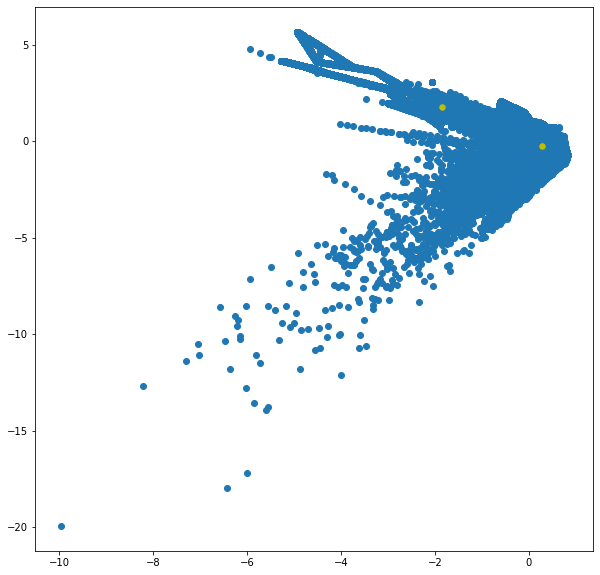

In [82]:
#kmeans on the data. Building 2 clusters and using kmeans++ initialization for faster convergence
kmeans2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans2.fit_predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=30, c='y')
plt.show()

IndexError: index 284807 is out of bounds for axis 0 with size 284807

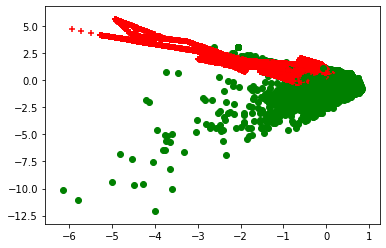

In [89]:
#plotting the clusters
for i in range(0, X.shape[0]):
    if kmeans2.labels_[i] == 1:
        c1 = plt.scatter(X[i,0],X[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = plt.scatter(X[i,0],X[i,1],c='g',  marker='o')
plt.legend([c1, c2],['Cluster 1', 'Cluster 0'])
plt.title('K-means clusters the Iris dataset into 2 clusters')
plt.show()

In [47]:
#joining the cluster labels and target labels with features data
X['ClusterID'] = pred_y
X['Class'] = y
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'ClusterID',
       'Class'],
      dtype='object')

In [33]:
#creating 2 PC components
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

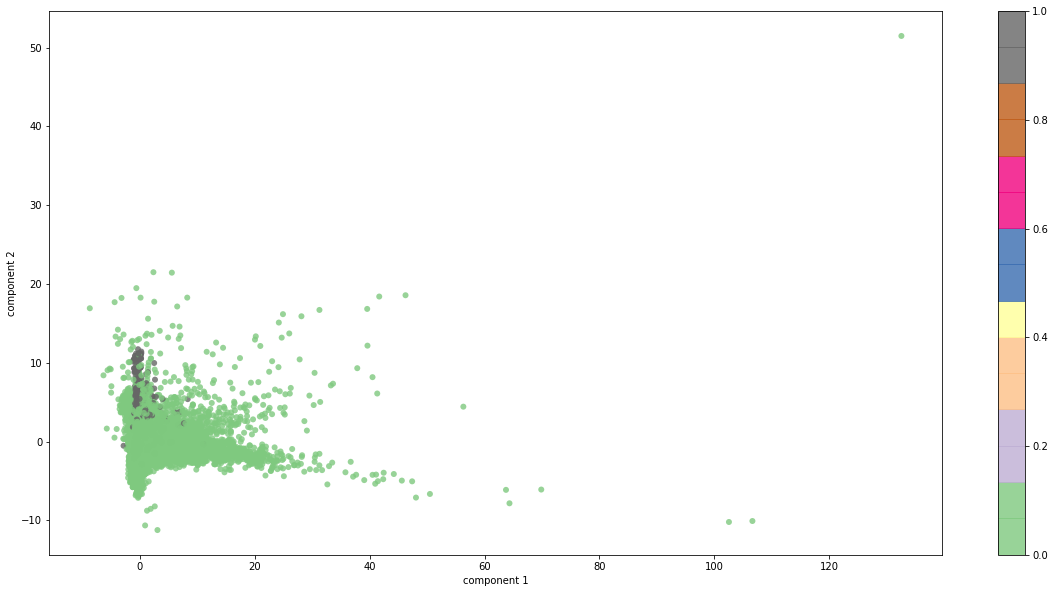

In [41]:
#Plotting the data against 2 principal components
plt.figure(figsize=(20,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('Accent', 15))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()